<a href="https://colab.research.google.com/github/ANISHG-26/ELG6131-Dementia-EDA/blob/main/ELG_6131_Dementia_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Dataset has low records

Use:

1. Cross Validation

In [95]:
import os
import pandas as pd
import seaborn as sns
from yellowbrick.target import FeatureCorrelation
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [64]:
original_data_directory = "ELG6131-Dementia-Dataset/"

if not(os.path.exists(original_data_directory.split("/")[0])):
  !git clone https://github.com/ANISHG-26/ELG6131-Dementia-Dataset.git
os.chdir(original_data_directory)

Cloning into 'ELG6131-Dementia-Dataset'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 6 (delta 0), pack-reused 0
Receiving objects: 100% (7/7), 31.87 KiB | 3.98 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [65]:
data = "first_ds.csv"
df = pd.read_csv(data)
df.rename ( columns = { 'Group': 'Dementia'}, inplace=True )
df.rename ( columns = { 'M/F': 'Sex'}, inplace=True )
df

,Subject ID,MRI ID,Dementia,Visit,MR Delay,Sex,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Dementia    373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   Sex         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [67]:
df.head().T

,0,1,2,3,4
Subject ID,OAS2_0001,OAS2_0001,OAS2_0002,OAS2_0002,OAS2_0002
MRI ID,OAS2_0001_MR1,OAS2_0001_MR2,OAS2_0002_MR1,OAS2_0002_MR2,OAS2_0002_MR3
Dementia,Nondemented,Nondemented,Demented,Demented,Demented
Visit,1,2,1,2,3
MR Delay,0,457,0,560,1895
Sex,M,M,M,M,M
Hand,R,R,R,R,R
Age,87,88,75,76,80
EDUC,14,14,12,12,12
SES,2.0,2.0,NaN,NaN,NaN


In [68]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visit,373.0,1.882038,0.922843,1.000,1.000,2.000,2.000,5.000
MR Delay,373.0,595.104558,635.485118,0.000,0.000,552.000,873.000,2639.000
Age,373.0,77.013405,7.640957,60.000,71.000,77.000,82.000,98.000
EDUC,373.0,14.597855,2.876339,6.000,12.000,15.000,16.000,23.000
SES,354.0,2.460452,1.134005,1.000,2.000,2.000,3.000,5.000
MMSE,371.0,27.342318,3.683244,4.000,27.000,29.000,30.000,30.000
CDR,373.0,0.290885,0.374557,0.000,0.000,0.000,0.500,2.000
eTIV,373.0,1488.128686,176.139286,1106.000,1357.000,1470.000,1597.000,2004.000
nWBV,373.0,0.729568,0.037135,0.644,0.700,0.729,0.756,0.837
ASF,373.0,1.195461,0.138092,0.876,1.099,1.194,1.293,1.587


In [69]:
print ("Number of unique subjects = ",len(df['Subject ID'].unique()))

Number of unique subjects =  150


### The values ​​of the **Hand** column is **[R]**. We will drop this as it hs no impact.

In [70]:
print (df.Hand.unique())
df.drop(columns=['Hand'], inplace=True)
df.columns

['R']


Index(['Subject ID', 'MRI ID', 'Dementia', 'Visit', 'MR Delay', 'Sex', 'Age',
       'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'],
      dtype='object')

<Axes: xlabel='Dementia', ylabel='count'>

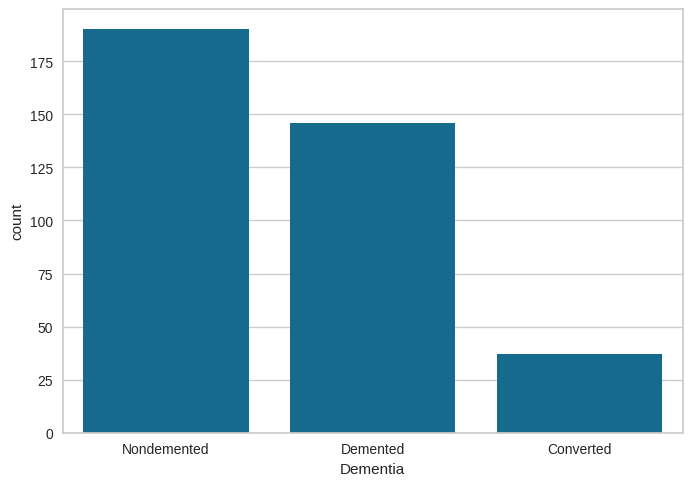

In [71]:
sns.countplot(x = df['Dementia'])

In [72]:
df.Dementia.value_counts()

Nondemented    190
Demented       146
Converted       37
Name: Dementia, dtype: int64

In [73]:
converted = df.loc[df.Dementia == 'Converted']
converted

,Subject ID,MRI ID,Dementia,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
33,OAS2_0018,OAS2_0018_MR1,Converted,1,0,F,87,14,1.0,30.0,0.0,1406,0.715,1.248
34,OAS2_0018,OAS2_0018_MR3,Converted,3,489,F,88,14,1.0,29.0,0.0,1398,0.713,1.255
35,OAS2_0018,OAS2_0018_MR4,Converted,4,1933,F,92,14,1.0,27.0,0.5,1423,0.696,1.234
36,OAS2_0020,OAS2_0020_MR1,Converted,1,0,M,80,20,1.0,29.0,0.0,1587,0.693,1.106
37,OAS2_0020,OAS2_0020_MR2,Converted,2,756,M,82,20,1.0,28.0,0.5,1606,0.677,1.093
38,OAS2_0020,OAS2_0020_MR3,Converted,3,1563,M,84,20,1.0,26.0,0.5,1597,0.666,1.099
57,OAS2_0031,OAS2_0031_MR1,Converted,1,0,F,86,12,3.0,30.0,0.0,1430,0.718,1.227
58,OAS2_0031,OAS2_0031_MR2,Converted,2,446,F,88,12,3.0,30.0,0.0,1445,0.719,1.215
59,OAS2_0031,OAS2_0031_MR3,Converted,3,1588,F,91,12,3.0,28.0,0.5,1463,0.696,1.199
81,OAS2_0041,OAS2_0041_MR1,Converted,1,0,F,71,16,1.0,27.0,0.0,1289,0.771,1.362


In [74]:
len(converted['Subject ID'].unique())

14

In [75]:
converted[["Subject ID", "MRI ID", "Visit"]]

,Subject ID,MRI ID,Visit
33,OAS2_0018,OAS2_0018_MR1,1
34,OAS2_0018,OAS2_0018_MR3,3
35,OAS2_0018,OAS2_0018_MR4,4
36,OAS2_0020,OAS2_0020_MR1,1
37,OAS2_0020,OAS2_0020_MR2,2
38,OAS2_0020,OAS2_0020_MR3,3
57,OAS2_0031,OAS2_0031_MR1,1
58,OAS2_0031,OAS2_0031_MR2,2
59,OAS2_0031,OAS2_0031_MR3,3
81,OAS2_0041,OAS2_0041_MR1,1


In [76]:
converted['Subject ID'].value_counts()

OAS2_0127    5
OAS2_0018    3
OAS2_0020    3
OAS2_0031    3
OAS2_0041    3
OAS2_0103    3
OAS2_0176    3
OAS2_0054    2
OAS2_0092    2
OAS2_0118    2
OAS2_0131    2
OAS2_0133    2
OAS2_0144    2
OAS2_0145    2
Name: Subject ID, dtype: int64

In [77]:
nondemented = [33,36,57,81,114,194,218,245,261,271,273,295,297,346]
demented = [35,38,59,83,115,195,220,246,265,272,274,296,298,348]
drop = [34,37,58,82,219,262,263,264,347]

In [78]:
for n in nondemented:
    df.Dementia.iloc[n] = 'Nondemented'
for n in demented:
    df.Dementia.iloc[n] = 'Demented'

<ipython-input-78-1b632490c1b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dementia.iloc[n] = 'Nondemented'
<ipython-input-78-1b632490c1b0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Dementia.iloc[n] = 'Demented'


In [79]:
df = df.drop(index=drop)

In [80]:
df = df.drop(columns = ['Subject ID','MRI ID'])

### Non-Null values that have to be imputed -> SES, MMSE

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 0 to 372
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Dementia  364 non-null    object 
 1   Visit     364 non-null    int64  
 2   MR Delay  364 non-null    int64  
 3   Sex       364 non-null    object 
 4   Age       364 non-null    int64  
 5   EDUC      364 non-null    int64  
 6   SES       345 non-null    float64
 7   MMSE      362 non-null    float64
 8   CDR       364 non-null    float64
 9   eTIV      364 non-null    int64  
 10  nWBV      364 non-null    float64
 11  ASF       364 non-null    float64
dtypes: float64(5), int64(5), object(2)
memory usage: 37.0+ KB


<Axes: xlabel='Dementia', ylabel='count'>

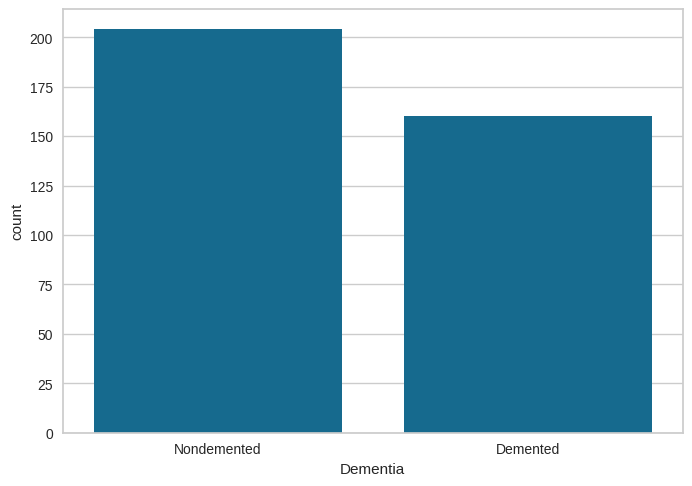

In [82]:
sns.countplot(x = df['Dementia'])

In [83]:
df.Dementia.value_counts()

Nondemented    204
Demented       160
Name: Dementia, dtype: int64

In [84]:
# features = []
# visualizer = FeatureCorrelation(labels=features)

# plt.rcParams['figure.figsize']=(20,20)
# visualizer.fit(X, y)     # Fit the data to the visualizer
# visualizer.show()

In [85]:
# Define a mapping dictionary
dementia_mapping = {'Nondemented': 0, 'Demented': 1}
# Use the map function to replace values
df['Dementia_Num'] = df['Dementia'].map(dementia_mapping)
df

,Dementia,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Dementia_Num
0,Nondemented,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883,0
1,Nondemented,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876,0
2,Demented,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046,1
3,Demented,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010,1
4,Demented,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037,1
369,Demented,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040,1
370,Nondemented,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331,0
371,Nondemented,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323,0


In [86]:
y = df.Dementia_Num
y

0      0
1      0
2      1
3      1
4      1
      ..
368    1
369    1
370    0
371    0
372    0
Name: Dementia_Num, Length: 364, dtype: int64

In [87]:
X = df.drop(['Dementia', 'Dementia_Num'], axis=1)
X

,Visit,MR Delay,Sex,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,1,0,M,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,2,457,M,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,0,M,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,2,560,M,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,3,1895,M,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...
368,2,842,M,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,3,2297,M,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,1,0,F,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,2,763,F,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [88]:
# Define preprocessing steps
numeric_features = ['Visit', 'MR Delay', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_features = ['Sex']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [89]:
# Define models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}


In [97]:
# Loop through models, fit pipeline, and evaluate
for name, model in models.items():
    print(f"Evaluating {name}:")
    # Create the pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Predict on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Cross-Validation Accuracy Scores:", scores)
    print("Accuracy:", accuracy)
    print()

Evaluating RandomForest:
Cross-Validation Accuracy Scores: [0.97260274 1.         1.         0.97260274 1.        ]
Accuracy: 0.990909090909091

Evaluating LogisticRegression:
Cross-Validation Accuracy Scores: [0.97260274 1.         1.         0.97260274 1.        ]
Accuracy: 0.990909090909091

Evaluating SVM:
Cross-Validation Accuracy Scores: [0.97260274 1.         1.         0.97260274 1.        ]
Accuracy: 0.990909090909091

